In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.datasets import load_svmlight_file
from method import SGD,SPS,SPSlack

import sys
import math
import seaborn as sns
import random
from tqdm import tqdm
%config InlineBackend.figure_format = 'svg'

markers = ["v","^","<",">","o","s","p","P","*"]
colors = sns.color_palette("colorblind")
!wget https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/mushrooms

--2022-08-01 14:33:15--  https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/mushrooms
Resolving www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)... 140.112.30.26
Connecting to www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)|140.112.30.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 879712 (859K)
Saving to: 'mushrooms.1'

mushrooms.1         100%[===================>] 859.09K   223KB/s    in 3.9s    

2022-08-01 14:33:21 (223 KB/s) - 'mushrooms.1' saved [879712/879712]



In [2]:
from joblib import Memory
from sklearn.datasets import load_svmlight_file
import torch
mem=Memory("./mecache")
def get_data(filePath):
    data = load_svmlight_file(filePath)
    return data[0], data[1]

A, y = get_data("mushrooms")
lambd=0.01
A = A.todense()
A = np.array(A)

n = A.shape[0]
d = A.shape[1]
print(A.shape)


#initialization
np.random.seed(10)
x0=0.1*np.random.randn(d,) #starting position
s0=0.1
def cost(x, random_ind):
    batch_size = len(random_ind)
    f = np.sum(np.log(1+np.exp(-np.dot(A[random_ind], x) * y[random_ind])))/(2*batch_size) 
    return f

def grad(x, random_ind):
    batch_size = len(random_ind)
    num = -y[random_ind]
    den = (1 + np.exp(np.dot(A[random_ind], x) * y[random_ind]))
    c = num/den
    c2 = np.dot(c.T,A[random_ind])
    final_grad = (c2)/(2*batch_size) 
    return final_grad
# working on this one
def hess(x,):
    A1=torch.as_tensor(A,dtype=torch.float32)
    x1=torch.tensor(x,dtype=torch.float32,requires_grad=True)
    y=torch.tensor(y,dtype=torch.float32)
    C=-y/(1+torch.exp(A1@x1*y))
    C1=C@A1
    for i in range(10000):
        z=[z0 for i in range(10000)]
        H=[H0 for i in range(10000)]
    for k in range(10000):
        v=np.random.uniform(0,1,size=(d,1))
        for vi in v:
            vi[vi<0.5]=-1
            vi[vi>=0.5]=1           
        z=torch.tensor(v,dtype=torch.float32)
        Hz=C1@z
        Hz.backward()
        H_sum+=z*x1.grad
    H=H_sum/10000
    return H

    
f0=cost(x0,range(n))

(8124, 112)


In [8]:
'''
A1=torch.as_tensor(A,dtype=torch.float32)
x=torch.tensor(x0,dtype=torch.float32,requires_grad=True)
y=torch.tensor(y,dtype=torch.float32)
C=-y/(1+torch.exp(A1@x*y))
C1=C@A1
v=np.random.uniform(0,1,size=(d,1))
for vi in v:
    vi[vi<0.5]=-1
    vi[vi>=0.5]=1
z=torch.tensor(v,dtype=torch.float32)
Hz=C1@z
Hz.backward()
H1=z*x.grad
print(H1,H1.shape,x.grad)
'''

tensor([[ 5.0006e+00,  1.4926e+03,  6.1462e+03,  ...,  4.1462e+02,
          3.2637e+02,  2.2129e+02],
        [ 5.0006e+00,  1.4926e+03,  6.1462e+03,  ...,  4.1462e+02,
          3.2637e+02,  2.2129e+02],
        [ 5.0006e+00,  1.4926e+03,  6.1462e+03,  ...,  4.1462e+02,
          3.2637e+02,  2.2129e+02],
        ...,
        [-5.0006e+00, -1.4926e+03, -6.1462e+03,  ..., -4.1462e+02,
         -3.2637e+02, -2.2129e+02],
        [-5.0006e+00, -1.4926e+03, -6.1462e+03,  ..., -4.1462e+02,
         -3.2637e+02, -2.2129e+02],
        [ 5.0006e+00,  1.4926e+03,  6.1462e+03,  ...,  4.1462e+02,
          3.2637e+02,  2.2129e+02]]) torch.Size([112, 112]) tensor([ 5.0006e+00,  1.4926e+03,  6.1462e+03,  8.8153e+02,  4.1462e+01,
         3.1530e+03,  3.6381e+03,  3.6677e+03,  2.4026e+00,  4.4116e+03,
         4.0352e+01,  1.7869e+02,  1.1097e+03,  4.4059e+03,  2.7221e+03,
         7.5762e+01, -1.5840e+01, -1.5340e+01,  1.3930e+03,  1.8253e+03,
         6.7870e+03,  4.9327e+03,  4.7296e+02,  2.925

/var/folders/cc/2k3t9mls2p5f0l7pyc7rvbhc0000gn/T/ipykernel_10498/3213237851.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y=torch.tensor(y,dtype=torch.float32)


In [4]:
'''
A1=torch.as_tensor(A,dtype=torch.float32)
x=torch.tensor(x0,dtype=torch.float32,requires_grad=True)
y=torch.tensor(y,dtype=torch.float32)
C=-y/(1+torch.exp(A1@x*y))
C1=C@A1
for k in range(10000):
    v=np.random.uniform(0,1,size=(d,1))
    for vi in v:
        vi[vi<0.5]=-1
        vi[vi>=0.5]=1
    z=torch.tensor(v,dtype=torch.float32)
    Hz=C1@z
    Hz.backward()
    H1=z*x.grad
H=H1/1000
print(x.grad)
print(z*x.grad)
print(Hz,Hz.shape)

print(x.shape,y.shape)
'''

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

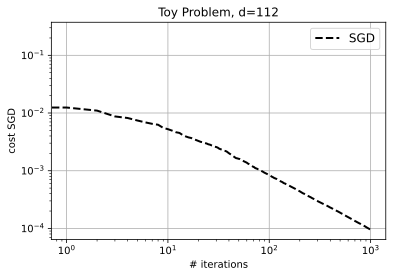

In [10]:
#full batch
batch_size = 10
K = 1000 #number of iterations
gamma = 1
_,ff_star,_ = SGD(cost, grad, hess, K, gamma, x0, batch_size, n)
f_sol = ff_star[-1]

#plotting angles
fig, ax = plt.subplots()
plt.xlabel('# iterations')
plt.ylabel('cost SGD')
plt.loglog(ff_star,'--',color = 'k',linewidth=2,label = 'SGD', markevery=2000)
plt.legend(fontsize=12)
plt.title(r"Toy Problem, d="+ str(d))
ax.grid()

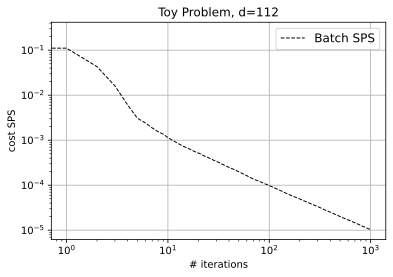

In [4]:
c=1
gamma_max = 10
batch_size = 50
K = 1000 #number of iterations
gamma = 1
_,ff_star,_= SPS(cost, grad, hess, K, c, gamma_max, x0, batch_size, n)
f_sol = ff_star[-1]

#plotting angles
fig, ax = plt.subplots()
plt.xlabel('# iterations')
plt.ylabel('cost SPS')
plt.loglog(ff_star,'--',color = 'k',linewidth=1,label = 'Batch SPS', markevery=2000)
plt.legend(fontsize=12)#字体大小
plt.title(r"Toy Problem, d="+ str(d))
ax.grid()

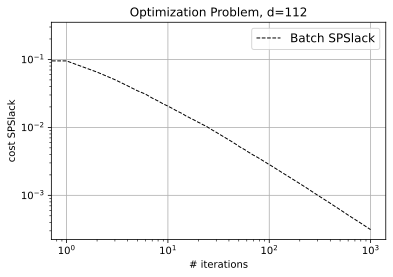

In [9]:
from method import SPSlack
gamma_max = 0.1 #0.01 0.2 0.3...
batch_size = 50
K = 1000 #number of iterations
_,ff_star,_= SPSlack(cost, grad,hess, K, gamma_max , x0,s0, batch_size, n)
f_sol = ff_star[-1]

#plotting angles
fig, ax = plt.subplots()
plt.xlabel('# iterations')
plt.ylabel('cost SPSlack')
plt.loglog(ff_star,'--',color = 'k',linewidth=1,label = 'Batch SPSlack', markevery=2000)
plt.legend(fontsize=12)#字体大小
plt.title(r"Optimization Problem, d="+ str(d))
ax.grid()

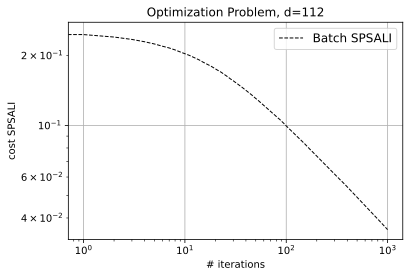

In [14]:
from method import SPSALI
gamma_max = 0.03
batch_size = 50
K = 1000 #number of iterations
_,ff_star,_= SPSALI(cost, grad,hess, K, gamma_max , x0,s0, batch_size, n)
f_sol = ff_star[-1]

#plotting angles
fig, ax = plt.subplots()
plt.xlabel('# iterations')
plt.ylabel('cost SPSALI')
plt.loglog(ff_star,'--',color = 'k',linewidth=1,label = 'Batch SPSALI', markevery=2000)
plt.legend(fontsize=12)#字体大小
plt.title(r"Optimization Problem, d="+ str(d))
ax.grid()

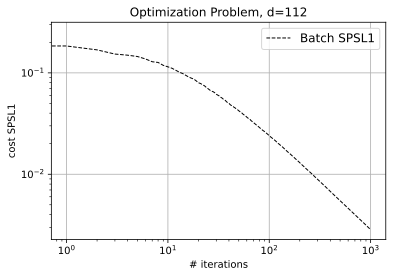

In [15]:
from method import SPSL1
gamma_max = 0.03
batch_size = 50
K = 1000 #number of iterations
_,ff_star,_= SPSL1(cost, grad,hess, K, gamma_max , x0,s0, batch_size, n)
f_sol = ff_star[-1]

#plotting angles
fig, ax = plt.subplots()
plt.xlabel('# iterations')
plt.ylabel('cost SPSL1')
plt.loglog(ff_star,'--',color = 'k',linewidth=1,label = 'Batch SPSL1', markevery=2000)
plt.legend(fontsize=12)#字体大小
plt.title(r"Optimization Problem, d="+ str(d))
ax.grid()

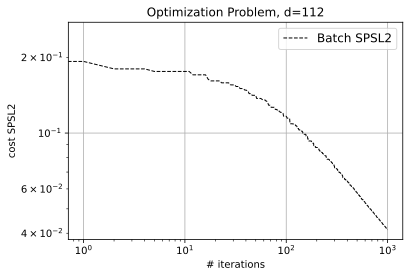

In [17]:
from method import SPSL2
gamma_max = 0.02
batch_size = 50
K = 1000 #number of iterations
_,ff_star,_= SPSL2(cost, grad,hess, K, gamma_max , x0,s0, batch_size, n)
f_sol = ff_star[-1]

#plotting angles
fig, ax = plt.subplots()
plt.xlabel('# iterations')
plt.ylabel('cost SPSL2')
plt.loglog(ff_star,'--',color = 'k',linewidth=1,label = 'Batch SPSL2', markevery=2000)
plt.legend(fontsize=12)#字体大小
plt.title(r"Optimization Problem, d="+ str(d))
ax.grid()